In [83]:
import numpy as np
import pandas as pd
import seaborn as sns
import gensim
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from subprocess import check_output
from tqdm import tqdm_notebook
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import os
from scipy.spatial.distance import cosine, cityblock, jaccard, canberra, euclidean, minkowski, braycurtis
import gc
import re
from nltk import word_tokenize
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
import distance
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import scipy
import xgboost as xgb
from bs4 import BeautifulSoup
from fuzzywuzzy import fuzz
from sklearn.manifold import TSNE
from sklearn.metrics import classification_report
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.metrics import precision_recall_curve, auc, roc_curve
from wordcloud import WordCloud, STOPWORDS
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
#from mlxtend.classifier import StackingClassifier
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [6]:
df = pd.read_csv('feat.csv')

In [7]:
df.head(2)

,Unnamed: 0,Unnamed: 0.1,question1,question2,is_duplicate,len_q1,len_q2,diff_len,len_char_q1,len_char_q2,len_word_q1,len_word_q2,common_words,fuzz_ratio,fuzz_partial_ratio,fuzz_partial_token_set_ratio,fuzz_partial_token_sort_ratio,fuzz_token_set_ratio,fuzz_token_sort_ratio,norm_wmd
0,0,0,what step step guide invest share market india?,what step step guide invest share market?,0,47,41,6,17,17,8,7,5,93,98,100,92,100,93,0.217555
1,1,1,what story kohinoor (koh-i-noor) diamond?,what would happen indian government stole kohi...,0,41,77,-36,17,24,5,10,3,66,85,100,82,91,64,1.368796


In [15]:
def wmd(q1, q2):
    q1 = str(q1).lower().split()
    q2 = str(q2).lower().split()
    stop_words = stopwords.words('english')
    q1 = [w for w in q1 if w not in stop_words]
    q2 = [w for w in q2 if w not in stop_words]
    return model.wmdistance(q1, q2)

def norm_wmd(q1, q2):
    q1 = str(q1).lower().split()
    q2 = str(q2).lower().split()
    stop_words = stopwords.words('english')
    q1 = [w for w in q1 if w not in stop_words]
    q2 = [w for w in q2 if w not in stop_words]
    return norm_model.wmdistance(q1, q2)


def sent2vec(s):
    words = str(s).lower()
    words = word_tokenize(words)
    words = [w for w in words if not w in stop_words]
    words = [w for w in words if w.isalpha()]
    M = []
    for w in words:
        try:
            M.append(model[w])
        except:
            continue
    M = np.array(M)
    v = M.sum(axis=0)
    return v / np.sqrt((v ** 2).sum())

In [9]:
model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)
df['wmd'] = df.apply(lambda x: wmd(x['question1'], x['question2']), axis=1)

In [10]:
df.head(2)

,Unnamed: 0,Unnamed: 0.1,question1,question2,is_duplicate,len_q1,len_q2,diff_len,len_char_q1,len_char_q2,...,len_word_q2,common_words,fuzz_ratio,fuzz_partial_ratio,fuzz_partial_token_set_ratio,fuzz_partial_token_sort_ratio,fuzz_token_set_ratio,fuzz_token_sort_ratio,norm_wmd,wmd
0,0,0,what step step guide invest share market india?,what step step guide invest share market?,0,47,41,6,17,17,...,7,5,93,98,100,92,100,93,0.217555,0.564615
1,1,1,what story kohinoor (koh-i-noor) diamond?,what would happen indian government stole kohi...,0,41,77,-36,17,24,...,10,3,66,85,100,82,91,64,1.368796,3.772346


In [12]:
df.drop(['Unnamed: 0','Unnamed: 0.1'],inplace = True,axis = 1)

In [ ]:
#df.to_csv('feat1.csv')

In [5]:
norm_model = gensim.models.KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin.gz', binary=True)
norm_model.init_sims(replace=True)
df['norm_wmd'] = df.apply(lambda x: norm_wmd(x['question1'], x['question2']), axis=1)

In [13]:
df.head(2)

,question1,question2,is_duplicate,len_q1,len_q2,diff_len,len_char_q1,len_char_q2,len_word_q1,len_word_q2,common_words,fuzz_ratio,fuzz_partial_ratio,fuzz_partial_token_set_ratio,fuzz_partial_token_sort_ratio,fuzz_token_set_ratio,fuzz_token_sort_ratio,norm_wmd,wmd
0,what step step guide invest share market india?,what step step guide invest share market?,0,47,41,6,17,17,8,7,5,93,98,100,92,100,93,0.217555,0.564615
1,what story kohinoor (koh-i-noor) diamond?,what would happen indian government stole kohi...,0,41,77,-36,17,24,5,10,3,66,85,100,82,91,64,1.368796,3.772346


In [16]:
question1_vectors = np.zeros((df.shape[0], 300))
for i, q in enumerate(tqdm_notebook(df.question1.values)):
    question1_vectors[i, :] = sent2vec(q)
    
question2_vectors  = np.zeros((df.shape[0], 300))
for i, q in enumerate(tqdm_notebook(df.question2.values)):
    question2_vectors[i, :] = sent2vec(q)

C:\Users\Suraj\anaconda3\envs\tensorflowenv\lib\site-packages\ipykernel_launcher.py:2: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



C:\Users\Suraj\anaconda3\envs\tensorflowenv\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning:

invalid value encountered in double_scalars



C:\Users\Suraj\anaconda3\envs\tensorflowenv\lib\site-packages\ipykernel_launcher.py:6: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`



In [19]:
df['cosine_distance'] = [cosine(x, y) for (x, y) in zip(np.nan_to_num(question1_vectors), np.nan_to_num(question2_vectors))]
df['cityblock_distance'] = [cityblock(x, y) for (x, y) in zip(np.nan_to_num(question1_vectors), np.nan_to_num(question2_vectors))]
df['jaccard_distance'] = [jaccard(x, y) for (x, y) in zip(np.nan_to_num(question1_vectors), np.nan_to_num(question2_vectors))]
df['canberra_distance'] = [canberra(x, y) for (x, y) in zip(np.nan_to_num(question1_vectors), np.nan_to_num(question2_vectors))]
df['euclidean_distance'] = [euclidean(x, y) for (x, y) in zip(np.nan_to_num(question1_vectors), np.nan_to_num(question2_vectors))]
df['minkowski_distance'] = [minkowski(x, y, 3) for (x, y) in zip(np.nan_to_num(question1_vectors), np.nan_to_num(question2_vectors))]
df['braycurtis_distance'] = [braycurtis(x, y) for (x, y) in zip(np.nan_to_num(question1_vectors), np.nan_to_num(question2_vectors))]
#df['skew_q1vec'] = [skew(x) for x in np.nan_to_num(question1_vectors)]
#df['skew_q2vec'] = [skew(x) for x in np.nan_to_num(question2_vectors)]
#df['kur_q1vec'] = [kurtosis(x) for x in np.nan_to_num(question1_vectors)]
#df['kur_q2vec'] = [kurtosis(x) for x in np.nan_to_num(question2_vectors)]

C:\Users\Suraj\anaconda3\envs\tensorflowenv\lib\site-packages\scipy\spatial\distance.py:714: RuntimeWarning:

invalid value encountered in double_scalars

C:\Users\Suraj\anaconda3\envs\tensorflowenv\lib\site-packages\scipy\spatial\distance.py:1172: RuntimeWarning:

invalid value encountered in double_scalars



NameError: name 'skew' is not defined

In [22]:
df.head(2)

,question1,question2,is_duplicate,len_q1,len_q2,diff_len,len_char_q1,len_char_q2,len_word_q1,len_word_q2,...,fuzz_token_sort_ratio,norm_wmd,wmd,cosine_distance,cityblock_distance,jaccard_distance,canberra_distance,euclidean_distance,minkowski_distance,braycurtis_distance
0,what step step guide invest share market india?,what step step guide invest share market?,0,47,41,6,17,17,8,7,...,93,0.217555,0.564615,0.068972,5.081614,1.0,94.023324,0.371408,0.168999,0.186557
1,what story kohinoor (koh-i-noor) diamond?,what would happen indian government stole kohi...,0,41,77,-36,17,24,5,10,...,64,1.368796,3.772346,0.512164,14.195119,1.0,177.588090,1.012091,0.455910,0.592655


In [21]:
df.shape

(404287, 26)

In [23]:
df.drop(['question1','question2'],axis = 1,inplace = True)

In [34]:
df.head()

,is_duplicate,len_q1,len_q2,diff_len,len_char_q1,len_char_q2,len_word_q1,len_word_q2,common_words,fuzz_ratio,...,fuzz_token_sort_ratio,norm_wmd,wmd,cosine_distance,cityblock_distance,jaccard_distance,canberra_distance,euclidean_distance,minkowski_distance,braycurtis_distance
0,0,47,41,6,17,17,8,7,5,93,...,93,0.217555,0.564615,0.068972,5.081614,1.0,94.023324,0.371408,0.168999,0.186557
1,0,41,77,-36,17,24,5,10,3,66,...,64,1.368796,3.772346,0.512164,14.195119,1.0,177.588090,1.012091,0.455910,0.592655
2,0,51,41,10,17,16,8,6,3,48,...,67,0.639209,1.780585,0.222009,9.055989,1.0,135.988707,0.666346,0.307828,0.342306
3,0,38,49,-11,14,21,8,5,0,11,...,25,1.263719,3.741994,0.650411,15.987437,1.0,192.237828,1.140536,0.506028,0.692421
4,0,69,36,33,24,16,11,6,1,34,...,48,1.240908,3.659165,0.369993,12.103178,1.0,161.408435,0.860225,0.382770,0.480633


In [26]:
df.to_csv('final_features.csv')

In [2]:
df = pd.read_csv('final_features.csv')

In [50]:
df = df.replace([np.inf, -np.inf], np.nan)

In [51]:
df.dropna(inplace = True)

In [5]:
df.drop('Unnamed: 0',axis = 1,inplace = True)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 402526 entries, 0 to 404286
Data columns (total 24 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   is_duplicate                   402526 non-null  int64  
 1   len_q1                         402526 non-null  int64  
 2   len_q2                         402526 non-null  int64  
 3   diff_len                       402526 non-null  int64  
 4   len_char_q1                    402526 non-null  int64  
 5   len_char_q2                    402526 non-null  int64  
 6   len_word_q1                    402526 non-null  int64  
 7   len_word_q2                    402526 non-null  int64  
 8   common_words                   402526 non-null  int64  
 9   fuzz_ratio                     402526 non-null  int64  
 10  fuzz_partial_ratio             402526 non-null  int64  
 11  fuzz_partial_token_set_ratio   402526 non-null  int64  
 12  fuzz_partial_token_sort_ratio 

In [52]:
X = df.iloc[:,1:]
y = df['is_duplicate']

In [53]:
X.isnull().sum()

len_q1                           0
len_q2                           0
diff_len                         0
len_char_q1                      0
len_char_q2                      0
len_word_q1                      0
len_word_q2                      0
common_words                     0
fuzz_ratio                       0
fuzz_partial_ratio               0
fuzz_partial_token_set_ratio     0
fuzz_partial_token_sort_ratio    0
fuzz_token_set_ratio             0
fuzz_token_sort_ratio            0
norm_wmd                         0
wmd                              0
cosine_distance                  0
cityblock_distance               0
jaccard_distance                 0
canberra_distance                0
euclidean_distance               0
minkowski_distance               0
braycurtis_distance              0
dtype: int64

In [54]:
X.head()

,len_q1,len_q2,diff_len,len_char_q1,len_char_q2,len_word_q1,len_word_q2,common_words,fuzz_ratio,fuzz_partial_ratio,...,fuzz_token_sort_ratio,norm_wmd,wmd,cosine_distance,cityblock_distance,jaccard_distance,canberra_distance,euclidean_distance,minkowski_distance,braycurtis_distance
0,47,41,6,17,17,8,7,5,93,98,...,93,0.217555,0.564615,0.068972,5.081614,1.0,94.023324,0.371408,0.168999,0.186557
1,41,77,-36,17,24,5,10,3,66,85,...,64,1.368796,3.772346,0.512164,14.195119,1.0,177.588090,1.012091,0.455910,0.592655
2,51,41,10,17,16,8,6,3,48,45,...,67,0.639209,1.780585,0.222009,9.055989,1.0,135.988707,0.666346,0.307828,0.342306
3,38,49,-11,14,21,8,5,0,11,19,...,25,1.263719,3.741994,0.650411,15.987437,1.0,192.237828,1.140536,0.506028,0.692421
4,69,36,33,24,16,11,6,1,34,50,...,48,1.240908,3.659165,0.369993,12.103178,1.0,161.408435,0.860225,0.382770,0.480633


In [11]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: is_duplicate, dtype: int64

In [6]:
df.head(2)

,is_duplicate,len_q1,len_q2,diff_len,len_char_q1,len_char_q2,len_word_q1,len_word_q2,common_words,fuzz_ratio,...,fuzz_token_sort_ratio,norm_wmd,wmd,cosine_distance,cityblock_distance,jaccard_distance,canberra_distance,euclidean_distance,minkowski_distance,braycurtis_distance
0,0,47,41,6,17,17,8,7,5,93,...,93,0.217555,0.564615,0.068972,5.081614,1.0,94.023324,0.371408,0.168999,0.186557
1,0,41,77,-36,17,24,5,10,3,66,...,64,1.368796,3.772346,0.512164,14.195119,1.0,177.588090,1.012091,0.455910,0.592655


In [55]:
infindex = np.where(df.values >= np.finfo(np.float64).max)

In [56]:
infindex

(array([], dtype=int64), array([], dtype=int64))

### Model Training

In [57]:
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,test_size=0.2,shuffle = True)

In [58]:
X_train.shape

(314676, 23)

In [59]:
X_test.shape

(78669, 23)

In [60]:
y_train.shape

(314676,)

In [61]:
y_test.shape

(78669,)

In [62]:
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    plt.figure(figsize=(20,4))
    
    labels = [1,2]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

### Logistic Regression with hyperparameter tuning

For values of alpha =  0.001 The log loss is: 0.5274358271644386
For values of alpha =  0.01 The log loss is: 0.5325859586284913
For values of alpha =  0.1 The log loss is: 0.5390346911444737
For values of alpha =  1 The log loss is: 0.5504663028313781
For values of alpha =  2 The log loss is: 0.5532594614965757
For values of alpha =  10 The log loss is: 0.5592336192071542


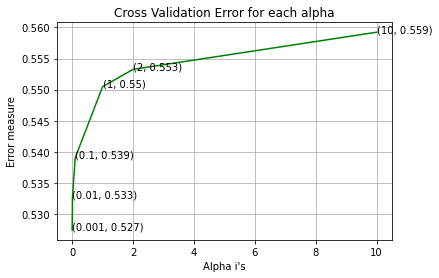

For values of best alpha =  0.001 The train log loss is: 0.5276053486048505
the predict proba are [[3.64885790e-01 6.35114210e-01]
 [4.91212096e-01 5.08787904e-01]
 [5.03942062e-01 4.96057938e-01]
 ...
 [7.10768013e-01 2.89231987e-01]
 [9.99999940e-01 6.02780752e-08]
 [9.99998317e-01 1.68291927e-06]]
For values of best alpha =  0.001 The test log loss is: 0.5274358271644386
Total number of data points : 78669
the round prediction


In [80]:
alpha = [0.001,0.01,0.1,1,2,10]

log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(X_train, y_train)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    
fig, ax = matplotlib.pyplot.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))



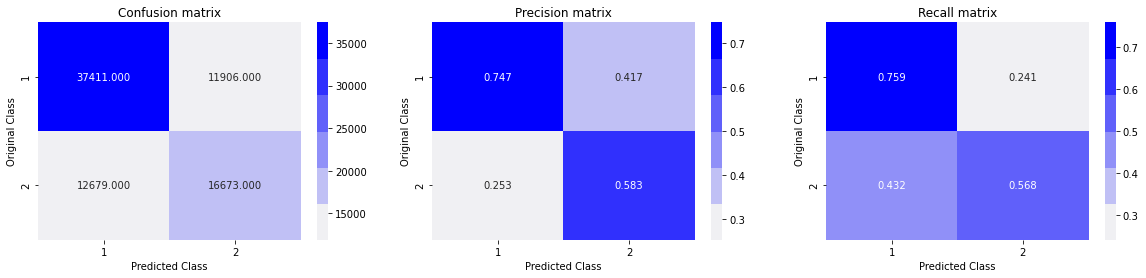

In [81]:
plot_confusion_matrix(y_test, predicted_y)

In [82]:
print(accuracy_score(y_test, predicted_y))

0.6874880829805896


In [85]:
print(classification_report(y_test, predicted_y))

              precision    recall  f1-score   support

           0       0.75      0.76      0.75     49317
           1       0.58      0.57      0.58     29352

    accuracy                           0.69     78669
   macro avg       0.67      0.66      0.66     78669
weighted avg       0.69      0.69      0.69     78669



### Linear SVM with hyperparameter tuning

For values of alpha =  0.001 The log loss is: 0.5275570776231561
For values of alpha =  0.01 The log loss is: 0.5385572086212989
For values of alpha =  0.1 The log loss is: 0.5613220961869032
For values of alpha =  1 The log loss is: 0.5816712483295432
For values of alpha =  2 The log loss is: 0.5847481871089317
For values of alpha =  10 The log loss is: 0.6050058600553042


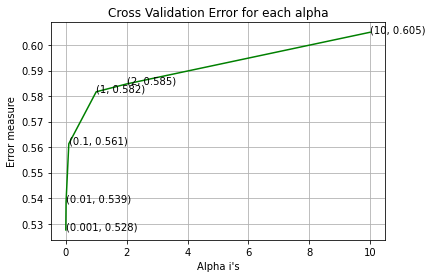

For values of best alpha =  0.001 The train log loss is: 0.5280282522236088
For values of best alpha =  0.001 The test log loss is: 0.5275570776231561
Total number of data points : 78669
-----------------------------------------------------------------------


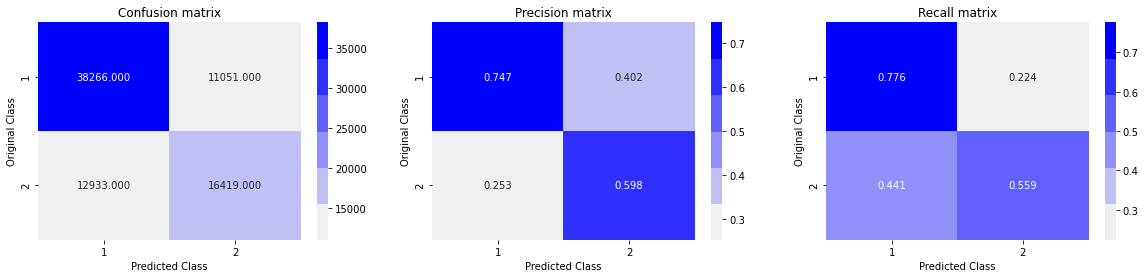

0.6951276868906431
              precision    recall  f1-score   support

           0       0.75      0.78      0.76     49317
           1       0.60      0.56      0.58     29352

    accuracy                           0.70     78669
   macro avg       0.67      0.67      0.67     78669
weighted avg       0.69      0.70      0.69     78669



In [86]:
alpha = [0.001,0.01,0.1,1,2,10]

log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge', random_state=42)
    clf.fit(X_train, y_train)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    
fig, ax = matplotlib.pyplot.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()

best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
print('-----------------------------------------------------------------------')
plot_confusion_matrix(y_test, predicted_y)
print(accuracy_score(y_test, predicted_y))
print(classification_report(y_test, predicted_y))

### XGBoost

In [87]:
import xgboost as xgb
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.02
params['max_depth'] = 4

d_train = xgb.DMatrix(X_train, label=y_train)
d_test = xgb.DMatrix(X_test, label=y_test)

watchlist = [(d_train, 'train'), (d_test, 'valid')]

bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=20, verbose_eval=10)

xgdmat = xgb.DMatrix(X_train,y_train)
predict_y = bst.predict(d_test)
print("The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

[0]	train-logloss:0.687194	valid-logloss:0.687134
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 20 rounds.
[10]	train-logloss:0.637434	valid-logloss:0.637595
[20]	train-logloss:0.600834	valid-logloss:0.601013
[30]	train-logloss:0.573877	valid-logloss:0.57403
[40]	train-logloss:0.553595	valid-logloss:0.553914
[50]	train-logloss:0.537911	valid-logloss:0.538298
[60]	train-logloss:0.5255	valid-logloss:0.525896
[70]	train-logloss:0.515371	valid-logloss:0.515856
[80]	train-logloss:0.507184	valid-logloss:0.507694
[90]	train-logloss:0.500646	valid-logloss:0.501149
[100]	train-logloss:0.495345	valid-logloss:0.495867
[110]	train-logloss:0.490828	valid-logloss:0.491392
[120]	train-logloss:0.487027	valid-logloss:0.487626
[130]	train-logloss:0.483777	valid-logloss:0.484375
[140]	train-logloss:0.48103	valid-logloss:0.481669
[150]	train-logloss:0.478831	valid-logloss:0.47946
[160]	train-logloss:0.477213	vali

In [88]:
model = xgb.XGBClassifier(max_depth=50, n_estimators=80, learning_rate=0.1, colsample_bytree=.7, gamma=0, reg_alpha=4, objective='binary:logistic', eta=0.3, silent=1, subsample=0.8).fit(X_train, y_train.values.ravel()) 
prediction = model.predict(X_test)
cm = confusion_matrix(y_test, prediction)  
print(cm)  
print('Accuracy', accuracy_score(y_test, prediction))
print(classification_report(y_test, prediction))

[[39560  9757]
 [ 7481 21871]]
Accuracy 0.7808793806963352
              precision    recall  f1-score   support

           0       0.84      0.80      0.82     49317
           1       0.69      0.75      0.72     29352

    accuracy                           0.78     78669
   macro avg       0.77      0.77      0.77     78669
weighted avg       0.79      0.78      0.78     78669



In [ ]:
import pickle
from sklearn.externals import joblib
file = open('XGBoostC.pkl', 'wb')
pickle.dump(model,file) 